In [1]:
import json
import numpy as np
filename = 'eatStuff'

In [2]:
with open('../agar.io-clone/bin/' + filename) as json_data:
    data = json.load(json_data,) 

In [3]:
answers = np.ones((len(data), 2))
food = np.ones((len(data), 50, 2))
virus = np.ones((len(data), 10, 2))

In [4]:

for i in range(len(data)):
    answers[i][0] = data[i]['x']
    answers[i][1] = data[i]['y']
    k = 0
    while k < len(data[i]['food'][filename]) or k < 50:
        if (k < len(data[i]['food'][filename])):
            food[i][k][0] = data[i]['food'][filename][k]['x']
            food[i][k][1] = data[i]['food'][filename][k]['y']
        else:
            food[i][k][0] = 0
            food[i][k][1] = 0
        k += 1
    k = 0
    while k < len(data[i]['virus'][filename]) or k < 10:
        if (k < len(data[i]['virus'][filename])):
            virus[i][k][0] = data[i]['virus'][filename][k]['x']
            virus[i][k][1] = data[i]['virus'][filename][k]['y']
        else:
            virus[i][k][0] = 0
            virus[i][k][1] = 0
        k += 1
    answers[i][1] = data[i]['y']
    #if (i == 12):
        #print(data[i])

In [5]:
virus[8]

array([[ 725.        , 3533.        ],
       [1288.49827584, 2863.49827584],
       [ 202.29925373, 3555.29925373],
       [ 628.74613392, 3282.74613392],
       [1120.45227269, 3004.45227269],
       [1400.14690015, 3174.14690015],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ]])

In [6]:
food[3]

array([[1485., 3023.],
       [ 802., 3542.],
       [1015., 2924.],
       [1365., 3627.],
       [1280., 3103.],
       [ 906., 3604.],
       [ 781., 3630.],
       [1334., 3437.],
       [ 735., 3291.],
       [1767., 3411.],
       [1408., 3277.],
       [1203., 2934.],
       [1153., 3008.],
       [1595., 3557.],
       [1156., 3088.],
       [1492., 3423.],
       [1573., 3588.],
       [1748., 3493.],
       [1562., 3479.],
       [1431., 2907.],
       [ 396., 2976.],
       [ 678., 3268.],
       [1092., 3435.],
       [1069., 2920.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   0.,    0.],
       [   

In [7]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.hidden_size = 10
        self.W1 = np.random.rand(x.shape[0], self.hidden_size) - 0.5
        self.b1 = np.random.rand(x.shape[0])
        self.W2 = np.random.rand(self.hidden_size, y.shape[0])
        self.b1 = np.random.rand(self.hidden_size)
    
    def train(self, data, out):
        return 0

In [11]:
class NeuralNetworkLayer:
    def __init__(self, x, y):
        print(x.shape)
        print(y.shape)
        self.x = x
        self.y = y
        self.hidden_size = 10
        self.W1 = np.random.rand(x.shape[0], y.shape[0]) - 0.5
        #self.W1 = np.random.rand(x.shape[0], 1) - 0.5
        self.b1 = np.random.rand(x.shape[0]) - 0.5
        self.lr = .0001
    
    def train(self, data, out):
        res = np.matmul(data + self.b1, self.W1)
        loss = out - res
        self.W1 += self.W1 * loss * self.lr
        return loss
    #
    def test(self, data, out):
        return 1

In [12]:
x = np.ones((len(data), 120))
for i in range(len(data)):
    concat_val = np.concatenate((food[i], virus[i]), axis=0)
    x[i] = concat_val.flatten()

In [37]:
network = NeuralNetworkLayer(x[0], answers[0])

(120,)
(2,)


In [38]:
answers[0][1]

356.5

In [39]:
network.train(x[0], answers[0][1])

array([ -932.020507  , -2302.43990814])

In [40]:
loss = 0
for i in range(len(data)):
    #print(answers[i][0])
    loss = network.train(x[i], answers[i][1])
    print(loss)
print('epoch 1')
print(loss)

[ -811.92775338 -1690.23497235]
[ -717.0598613  -1344.28866941]
[ -640.07919278 -1115.65357568]
[-576.29023225 -951.41223561]
[-522.53444229 -826.97586521]
[-476.60186509 -729.10526745]
[-436.89607482 -649.95321556]
[-402.23291173 -584.53846518]
[-371.7141769  -529.53114717]
[-344.64542356 -482.61303819]
[-320.48076741 -442.11634892]
[-298.78483583 -406.80821448]
[-279.20591862 -375.7562093 ]
[-261.45663312 -348.24122755]
[-245.29974705 -323.69923253]
[-230.53761448 -301.68123558]
[-217.00418935 -281.82514274]
[-204.55890818 -263.8355353 ]
[-193.08194841 -247.46887949]
[-182.47051307 -232.52252931]
[-172.63589047 -218.82642847]
[-163.5011059  -206.23676572]
[-154.99903032 -194.63106467]
[-147.07084494 -183.90434208]
[-139.66478598 -173.96607158]
[-132.73511111 -164.73776172]
[-126.24124343 -156.1510075 ]
[-120.14705795 -148.14591037]
[-114.42028378 -140.66978759]
[-601.03200053 -625.67611075]
[-550.05203757 -572.00696249]
[-507.98439859 -527.72284431]
[-473.98003623 -491.86068515]
[-44

[90.24286337 90.24286233]
[88.95176573 88.95176469]
[87.66224344 87.66224239]
[87.3743803  87.37437924]
[86.08494725 86.08494619]
[83.79729394 83.79729288]
[83.51487438 83.51487332]
[83.23104803 83.23104696]
[82.94582396 82.94582288]
[82.6592115  82.65921041]
[83.37122029 83.3712192 ]
[83.07834736 83.07834627]
[82.78407013 82.78406903]
[82.48839912 82.48839802]
[82.19134519 82.19134408]
[81.89291947 81.89291836]
[81.5931334  81.59313228]
[81.29199871 81.29199759]
[80.98952743 80.9895263 ]
[80.68573189 80.68573076]
[80.3806247  80.38062356]
[78.07421878 78.07421764]
[75.7742125  75.77421135]
[73.48077089 73.48076974]
[72.19405459 72.19405343]
[70.91028903 70.91028787]
[70.62955725 70.62955608]
[70.34795407 70.3479529 ]
[70.06549264 70.06549147]
[69.78218628 69.7821851 ]
[70.49804847 70.49804729]
[73.20899271 73.20899153]
[74.90670541 74.90670422]
[76.59514374 76.59514255]
[78.27417289 78.2741717 ]
[77.94365372 77.94365253]
[77.61195401 77.61195281]
[77.27909151 77.2790903 ]
[76.94508425

[-203.50008226 -203.50008226]
[-201.50008058 -201.50008058]
[-201.50007896 -201.50007896]
[-201.50007737 -201.50007737]
[-200.50007581 -200.50007581]
[-200.50007429 -200.50007429]
[-200.5000728 -200.5000728]
[-199.50007134 -199.50007134]
[-199.50006992 -199.50006992]
[-199.50006852 -199.50006852]
[-197.50006715 -197.50006715]
[-197.50006583 -197.50006583]
[-196.50006453 -196.50006453]
[-193.50006326 -193.50006326]
[-187.50006204 -187.50006204]
[-182.50006087 -182.50006087]
[-177.50005976 -177.50005976]
[-173.5000587 -173.5000587]
[-170.50005768 -170.50005768]
[-169.5000567 -169.5000567]
[-168.50005574 -168.50005574]
[-167.5000548 -167.5000548]
[-167.50005388 -167.50005388]
[-167.50005298 -167.50005298]
[-167.50005209 -167.50005209]
[-167.50005122 -167.50005122]
[-167.50005036 -167.50005036]
[-167.50004952 -167.50004952]
[-167.50004869 -167.50004869]
[-167.50004787 -167.50004787]
[-167.50004707 -167.50004707]
[-167.50004628 -167.50004628]
[-167.50004551 -167.50004551]
[-169.50004474 -16

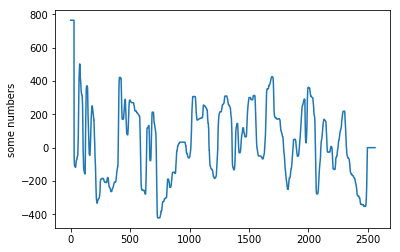

In [41]:
import matplotlib.pyplot as plt
plt.plot(answers[:, 0])
plt.ylabel('some numbers')
plt.show()

In [42]:
network = NeuralNetworkLayer(x[0], answers[0])
loss = 0
for i in range(len(data)):
    #print(answers[i][0])
    loss = network.train(x[i], answers[i])
    print(loss)
print('epoch 1')
print(loss)

(120,)
(2,)
[-9409.78719475 -2460.52601357]
[  164.4710307  -1767.38943484]
[  154.59406884 -1392.01546005]
[  145.15755519 -1148.6194048 ]
[ 136.1600738  -975.73846931]
[ 127.59778472 -845.74683683]
[ 119.46467366 -744.0671909 ]
[ 111.75280695 -662.17759708]
[ 104.4525862  -594.72304874]
[  97.55299764 -538.15162158]
[  91.04185205 -490.00579949]
[  84.90601225 -448.52652439]
[  79.13160541 -412.41894948]
[  73.70421869 -380.70727495]
[  68.60907715 -352.64125767]
[  63.83120329 -327.63401118]
[  59.35555849 -305.21945415]
[  55.1671665  -285.02248909]
[  51.25121989 -266.73765543]
[  47.59317032 -250.11356033]
[  44.17880378 -234.9413326 ]
[  40.99430196 -221.04593111]
[  38.02629114 -208.2795133 ]
[  35.26187975 -196.51631309]
[  32.68868596 -185.64864039]
[  30.29485651 -175.5837246 ]
[  28.06907782 -166.24120038]
[  26.00058068 -157.55108792]
[  24.07913927 -149.4521571 ]
[-788.70493439 -633.89059297]
[-762.12742973 -579.29808212]
[-729.98820177 -534.25655875]
[-690.85380867 -497.

[-53.27913886 -62.10266171]
[-41.2669958  -52.03681636]
[-28.25764059 -42.98198612]
[-13.25126103 -28.93693246]
[28.75172217 17.09326882]
[66.74525799 60.07548032]
[98.73020865 94.01285451]
[124.70779895 120.91426186]
[139.67921342 137.78626519]
[151.64679685 151.63864464]
[162.61111128 165.47394452]
[174.5722653  177.29149203]
[182.52988378 187.09277472]
[190.48479678 194.87935378]
[195.43688598 199.65289138]
[198.38679328 202.41636043]
[200.33495071 204.17176779]
[204.28156046 206.9200601 ]
[206.22602775 208.65975591]
[210.16882122 213.39183169]
[211.10931867 213.11211408]
[212.0482937  212.82680201]
[211.98570327 212.53579971]
[211.92180449 212.23901047]
[211.85657081 211.93633664]
[211.7899752  211.62767969]
[211.72199009 211.31294023]
[211.65258741 210.992018  ]
[211.58173856 210.66481196]
[211.50941439 210.33122027]
[211.43558522 209.99114035]
[211.36022081 209.64446892]
[212.28329035 209.29110204]
[213.20439082 208.93093512]
[216.12346676 208.563863  ]
[219.03968578 206.18978   

[-100.9067277 -224.5003238]
[-106.42331658 -224.50031653]
[-107.91862192 -224.50030942]
[-107.41228262 -224.50030248]
[-106.9137577  -224.50029569]
[-106.42287646 -224.50028905]
[-105.93947314 -224.50028256]
[-106.46338673 -224.50027621]
[-107.99001446 -224.50027001]
[-108.51496623 -224.50026395]
[-108.04276372 -224.50025803]
[-108.57771781 -224.50025223]
[-108.11541866 -224.50024657]
[-108.66008605 -224.50024104]
[-112.2074072  -224.50023562]
[-116.74502957 -222.50023033]
[-121.2693516  -221.50022521]
[-123.78100778 -220.50022022]
[-126.28859446 -218.50021537]
[-136.79242432 -217.50021066]
[-147.26177334 -213.50020608]
[-160.69832368 -209.50020168]
[-172.09251794 -207.50019745]
[-177.45418346 -207.50019336]
[-178.80728873 -205.50018934]
[-180.1670283  -205.50018545]
[-181.53343441 -205.50018164]
[-183.90653711 -205.50017791]
[-187.28297373 -205.50017425]
[-188.6596403  -205.50017067]
[-188.0434847  -205.50016716]
[-187.44092785 -205.50016373]
[-186.85159618 -205.50016036]
[-187.275129